In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
train_df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

# EXPLORATORY DATA ANALYSIS

In [38]:
print('Train dataset:-')
display(train_df.head(5))
print('                    ')
print('                    ')
print('Test dataset:-')
display(test_df.head(5))

Train dataset:-


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


                    
                    
Test dataset:-


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


Attribute related to eating:- 



| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

In [39]:
print(f'Train dataset:- {train_df.shape}')
print(f'Test dataset:-{test_df.shape}')

Train dataset:- (20758, 18)
Test dataset:-(13840, 17)


In [40]:
print('Train dataset info:-')
display(train_df.info())
print('                           ')
print('___________________________________________________________________')
print('                           ')
print('                           ')
print('Test dataset info:-')
display(test_df.info())
print('                           ')

Train dataset info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC        

None

                           
___________________________________________________________________
                           
                           
Test dataset info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-n

None

In [41]:
print('Train dataset :-')
display(train_df.describe())
print('                    ')
print('                    ')
print('Test dataset :-')
display(test_df.describe())

Train dataset :-


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


                    
                    
Test dataset :-


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [42]:
test_df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


### Adding the BMI feature to the dataset

 - BMI (Body Mass Index): BMI is a common feature used to assess obesity.
 - Calculate BMI using the formula: BMI = Weight (kg) / (Height (m) * Height (m))
 - Check relationship between BMI and 'NObeyesdad'

In [43]:
train_df['BMI'] = train_df['Weight'] / (train_df['Height'] ** 2)
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


In [44]:
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,35.315411
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,25.781250
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,41.324115
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,42.976937
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,39.584143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,26.333478
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,24.524346
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,17.652091
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,20.195092


# SUMMARY

In [45]:
def summary(df):
    summary_data = {
        "data type": df.dtypes,
        "#missing": df.isnull().sum(),
        "Duplicate": df.duplicated().sum(),
        "#unique": df.nunique(),
        "min": df.min(numeric_only=True),
        "max": df.max(numeric_only=True),
        "avg": df.mean(numeric_only=True),
        "std dev": df.std(numeric_only=True),
        "top value": df.mode().iloc[0],
        "Freq": df.apply(lambda x: x.value_counts().iloc[0])
    }
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [46]:
summary(train_df.drop(columns=["id"])).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,18.000000,1916
BMI,float64,0,0,12605,12.868541,54.997991,30.241842,8.333932,17.301038,191
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
CALC,object,0,0,3,nan,nan,nan,nan,Sometimes,15066
CH2O,float64,0,0,1506,1.000000,3.000000,2.029418,0.608467,2.000000,6616
FAF,float64,0,0,1360,0.000000,3.000000,0.981747,0.838302,0.000000,5044
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,3.000000,7658
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,1.700000,1334


# DATA VISUALIZATION

## 1. Comparing Numerical Attributes with Target Variable

### 1.1 Average BMI VS NObeyesdad

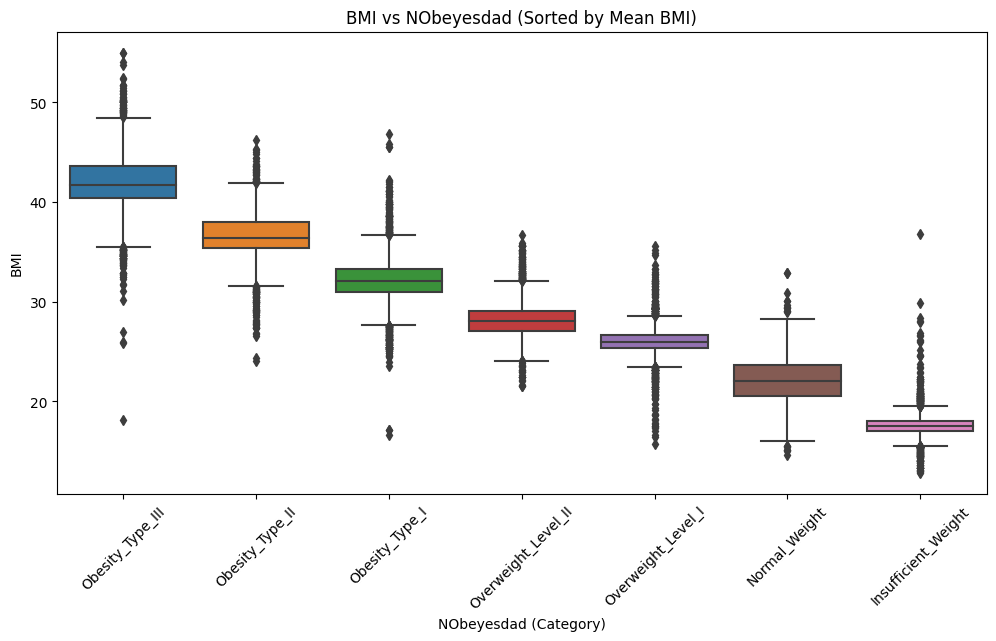

In [47]:
mean_bmi_by_category = train_df.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('BMI')
plt.title('BMI vs NObeyesdad (Sorted by Mean BMI)')
plt.show()


### 1.2 Age VS NObeyesdad

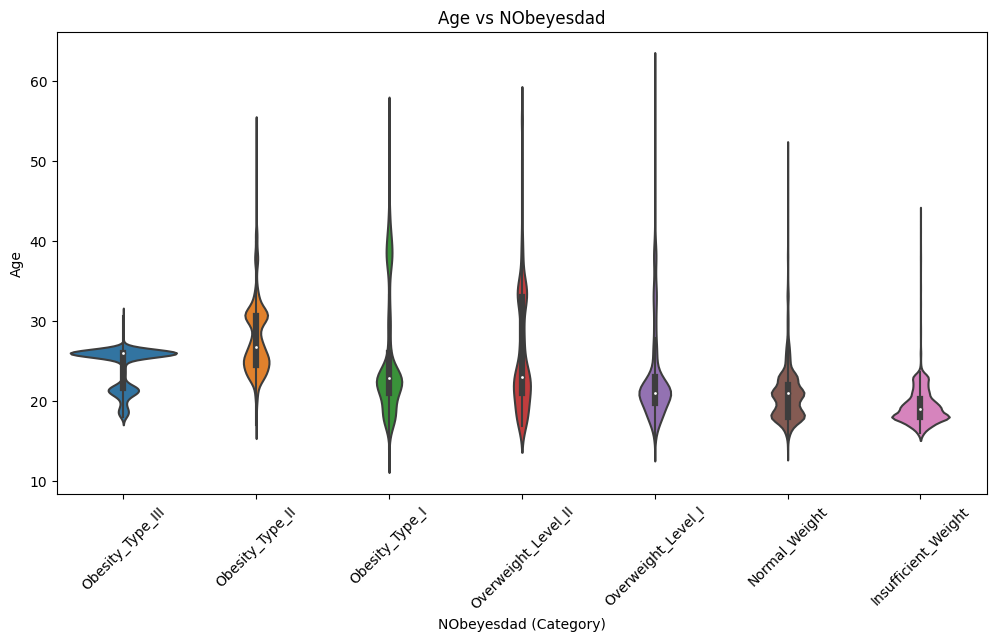

In [48]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Age', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('Age')
plt.title('Age vs NObeyesdad')
plt.show()

### 1.3 Height VS NObeyesdad

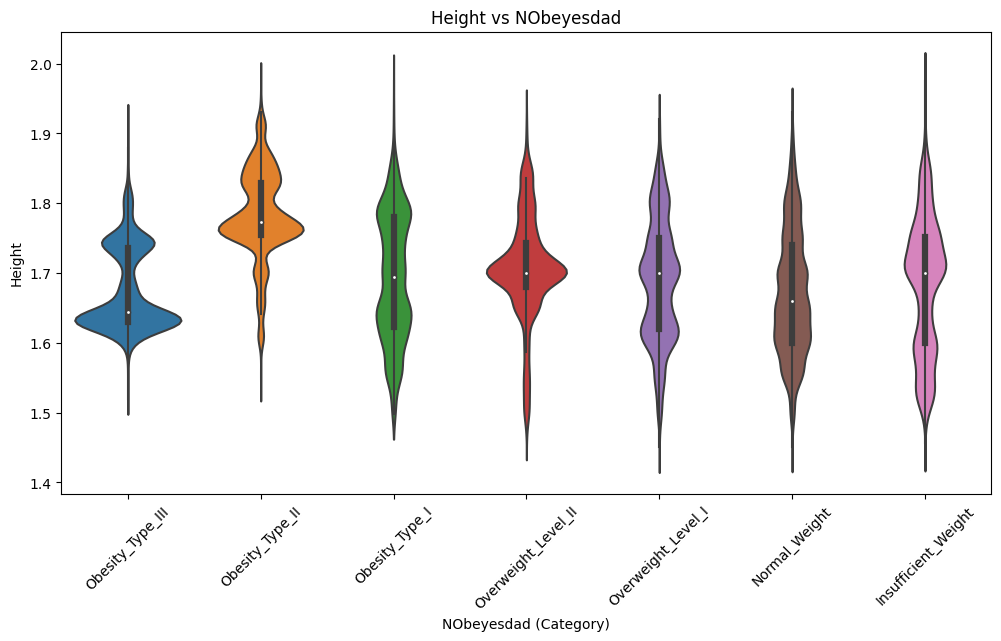

In [49]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Height', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('Height')
plt.title('Height vs NObeyesdad')
plt.show()

### 1.4 Weight VS NObeyesdad

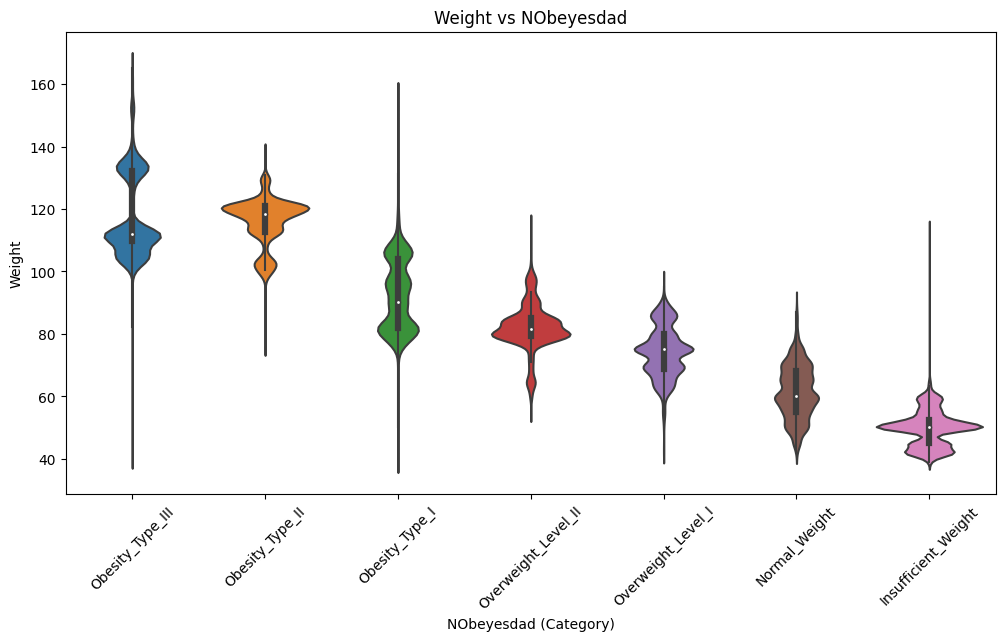

In [50]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Weight', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('Weight')
plt.title('Weight vs NObeyesdad')
plt.show()

### 1.5 FCVC VS NObeyesdad

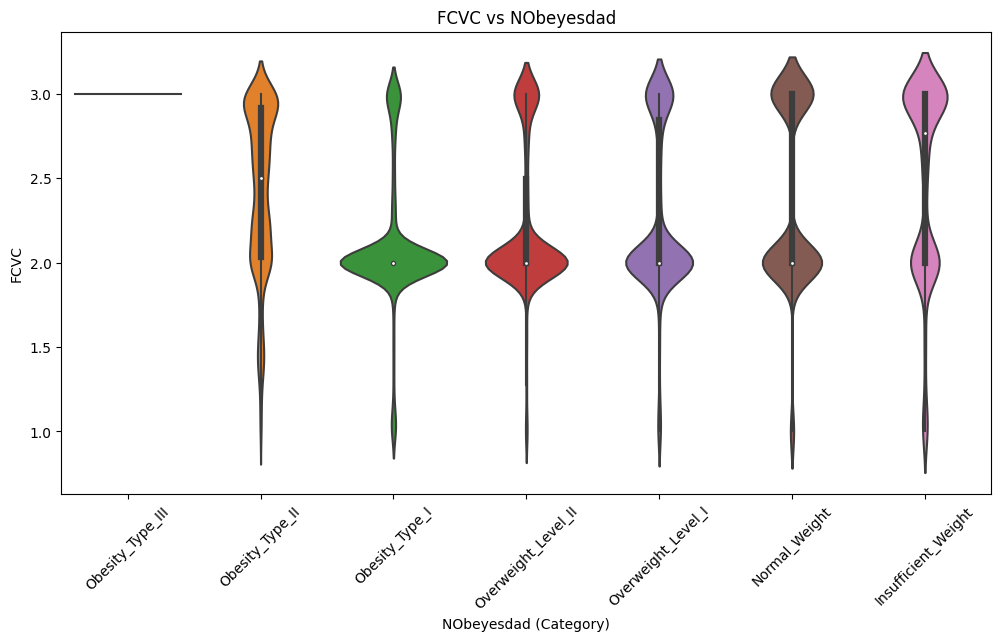

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='FCVC', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('FCVC')
plt.title('FCVC vs NObeyesdad')
plt.show()

### 1.6 NCP VS NObeyesdad

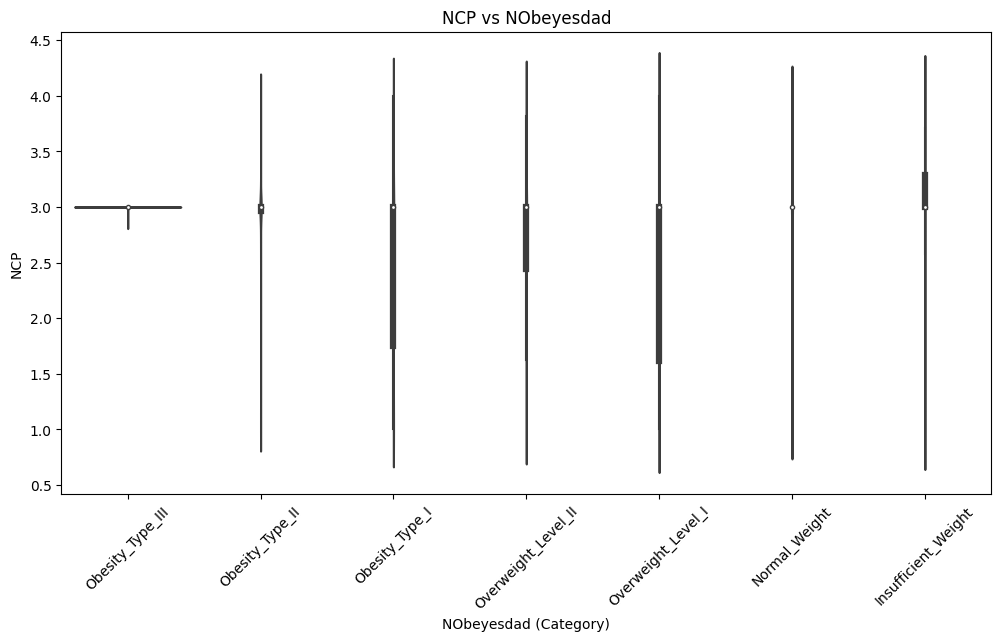

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='NCP', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('NCP')
plt.title('NCP vs NObeyesdad')
plt.show()

### 1.7 CH2O VS NObeyesdad

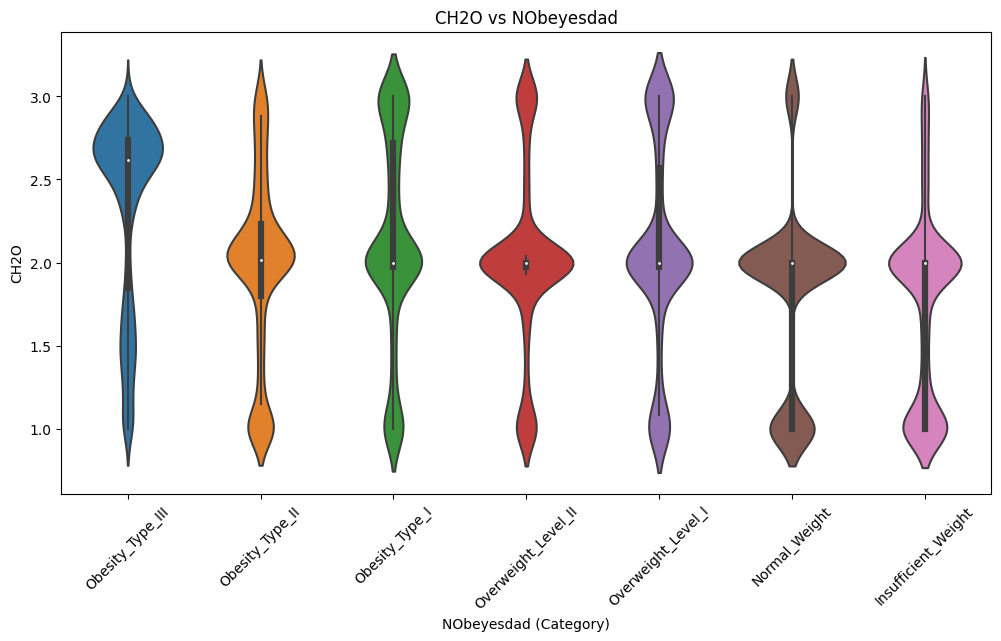

In [53]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='CH2O', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('CH2O')
plt.title('CH2O vs NObeyesdad')
plt.show()

### 1.8 FAF VS NObeyesdad

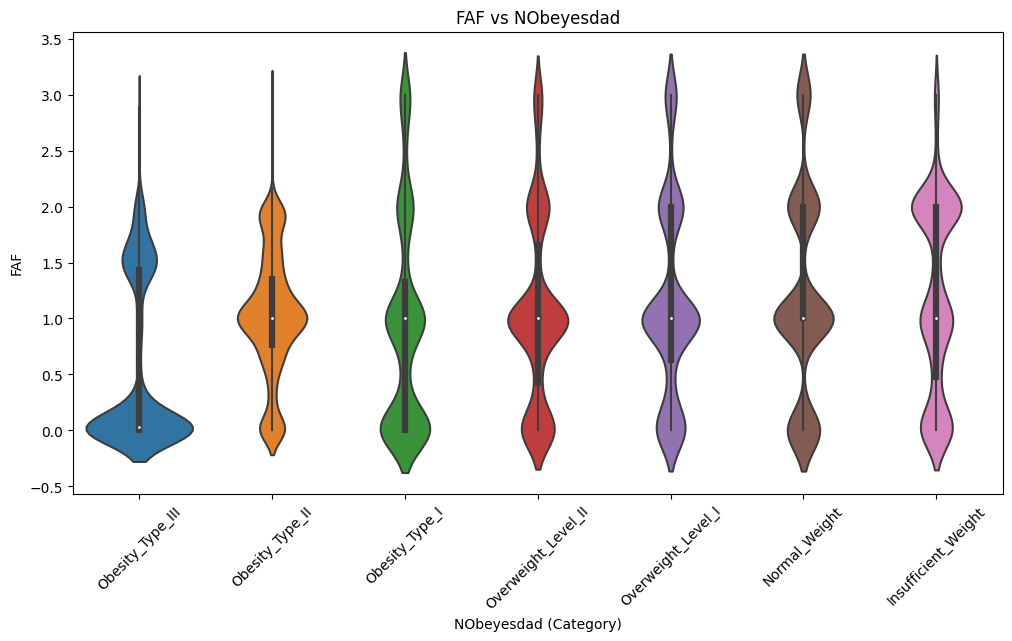

In [54]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='FAF', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('FAF')
plt.title('FAF vs NObeyesdad')
plt.show()

### 1.9 TUE VS NObeyesdad

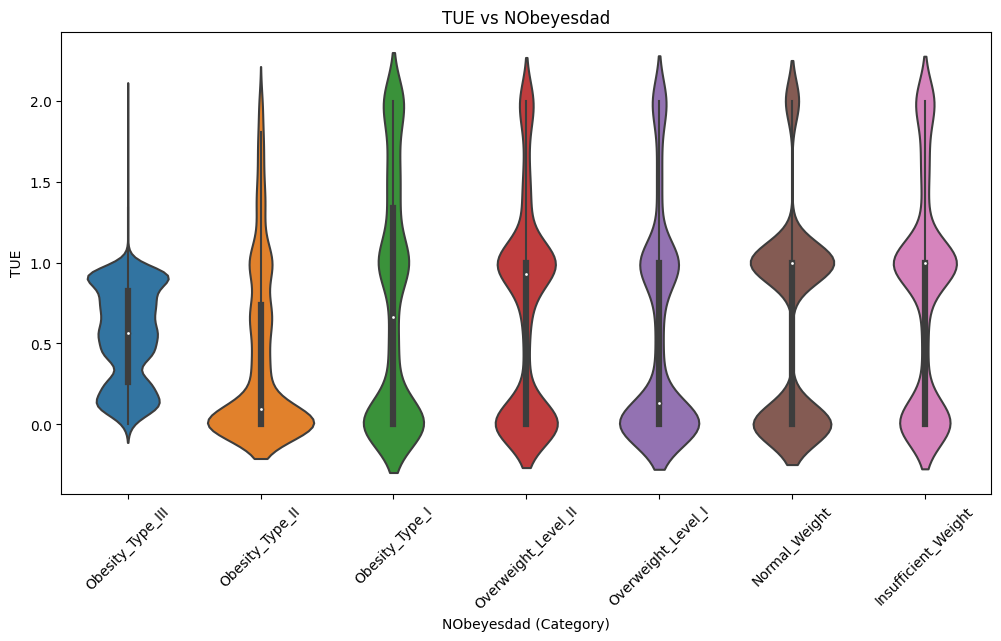

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='TUE', data=train_df, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('TUE')
plt.title('TUE vs NObeyesdad')
plt.show()

## 2. Visualizing the Distribution of Unique values in the Categorical attributes

In [56]:
def showplot(column_name):
    # Check if the column exists in the DataFrame
    if column_name not in train_df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    # Count the occurrences of each value in the column
    counts = train_df[column_name].value_counts()
    
    # Create a figure with two subplots: one for the donut chart and one for the horizontal bar chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    # Donut chart
    wedges, texts, autotexts = ax1.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                       startangle=90, wedgeprops=dict(width=0.3))
    
    # Extract colors from the donut chart
    colors = [wedge.get_facecolor() for wedge in wedges]
    
    # Add a circle at the center to create the donut shape
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.axis('equal')
    
    # Horizontal bar chart
    ax2.barh(counts.index, counts, color=colors)
    ax2.set_xlabel('Count')
    
    # Add a single title for both plots
    fig.suptitle(f'Distribution of {column_name}', fontsize=16)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to leave space for the suptitle
    
    # Show the plot
    plt.show()

### 2.1 NObeyesdad

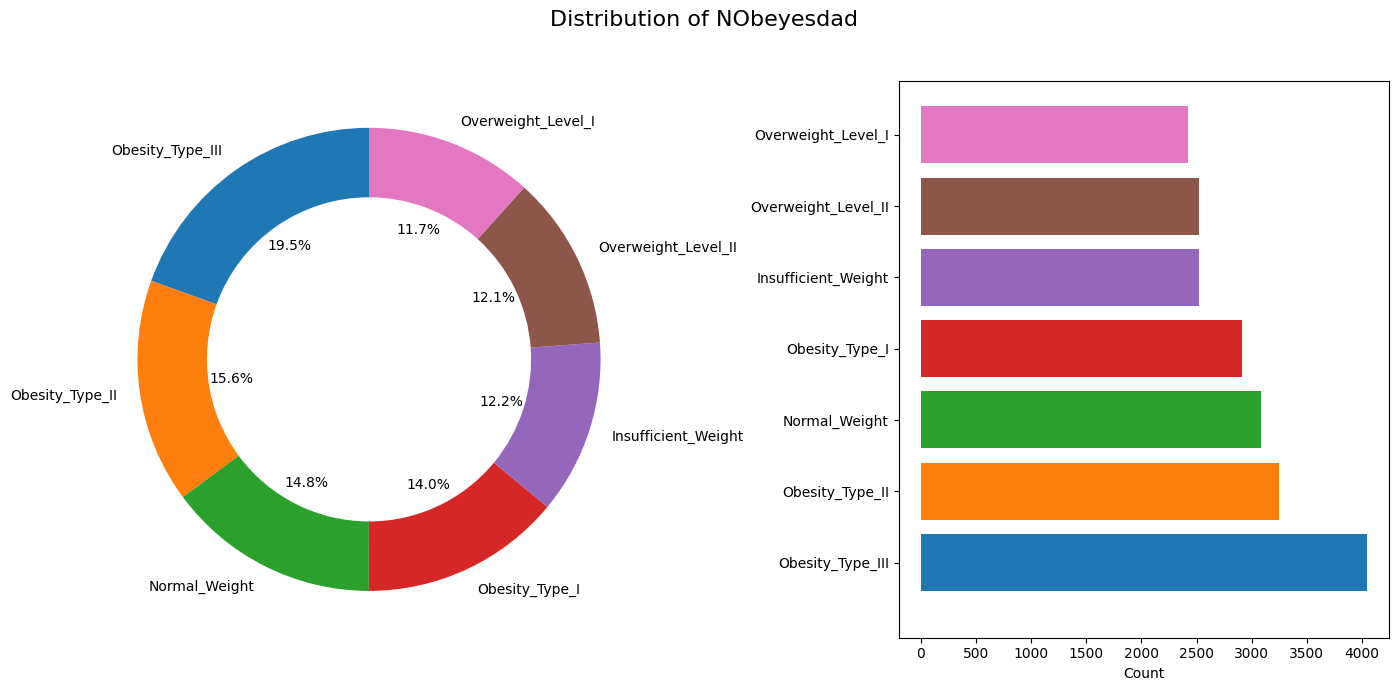

In [57]:
showplot('NObeyesdad')

### 2.2 Gender

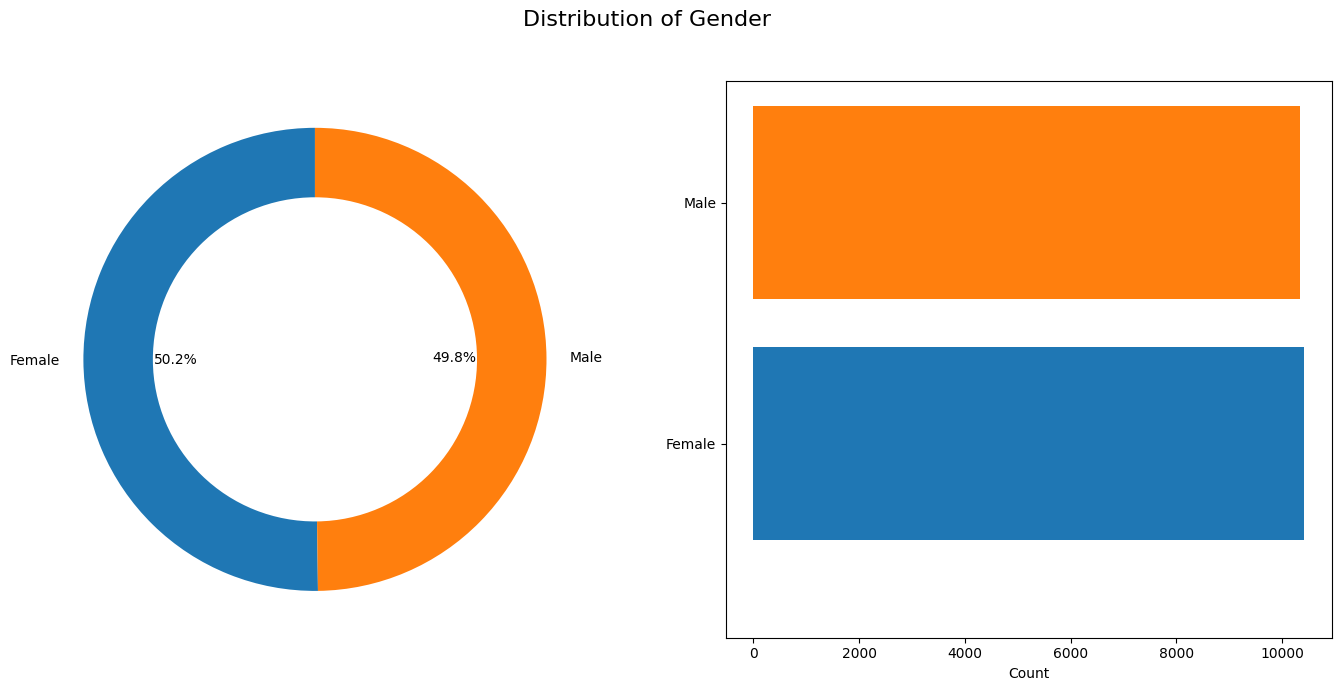

In [58]:
showplot('Gender')

The dataset have almost equal distribution of both the genders

### 2.3 family_history_with_overweight

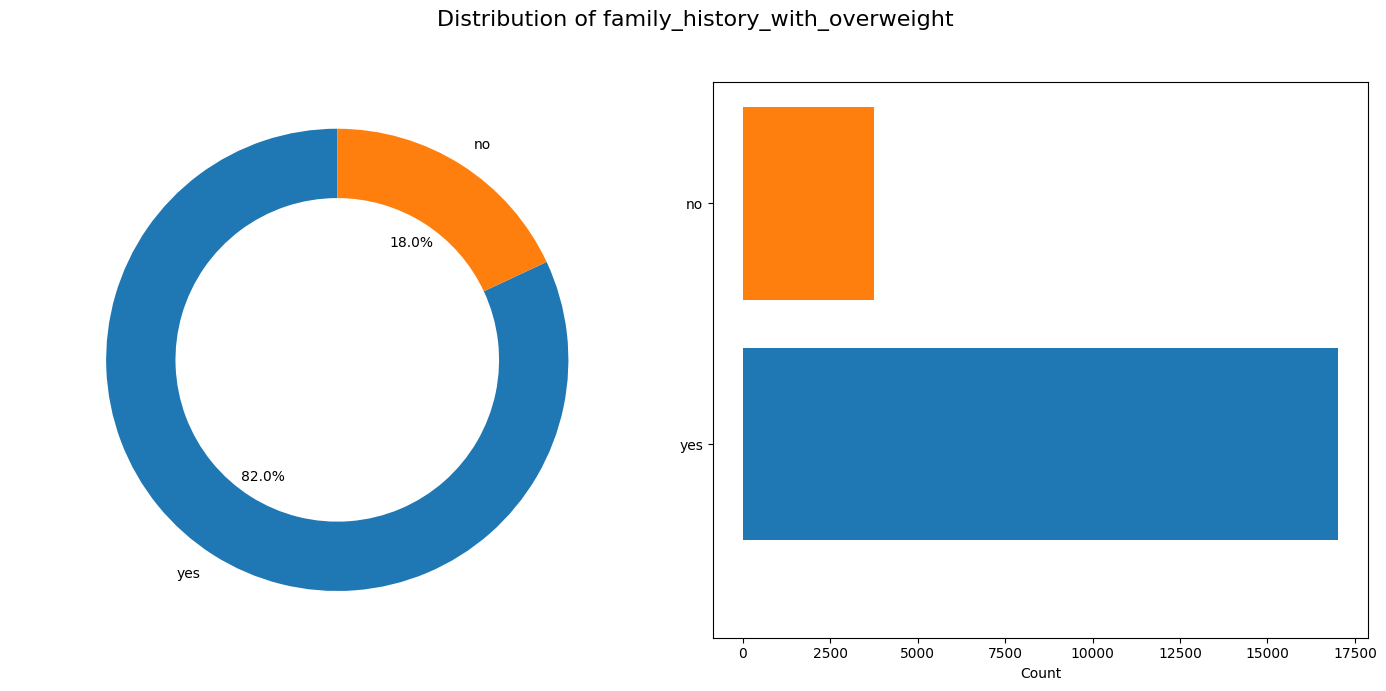

In [59]:
showplot('family_history_with_overweight')

- 82% people have a history of family members suffering obesety
- 18% people do not have the history of family members with obesety

### 2.4 FAVC

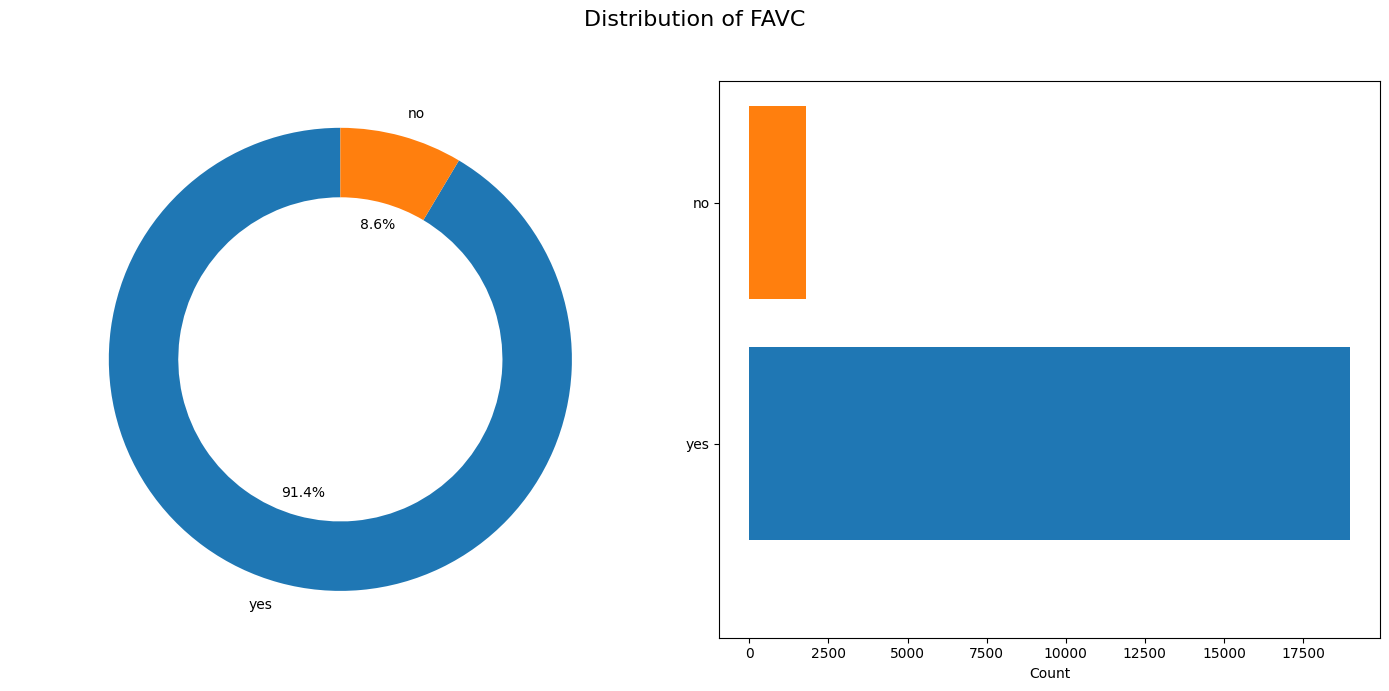

In [60]:
showplot('FAVC')

Frequency of consumption of vegetables
- 91.4% people consume vegetables
- 8.6% people do not frequently consume vegetables

### 2.5 CAEC

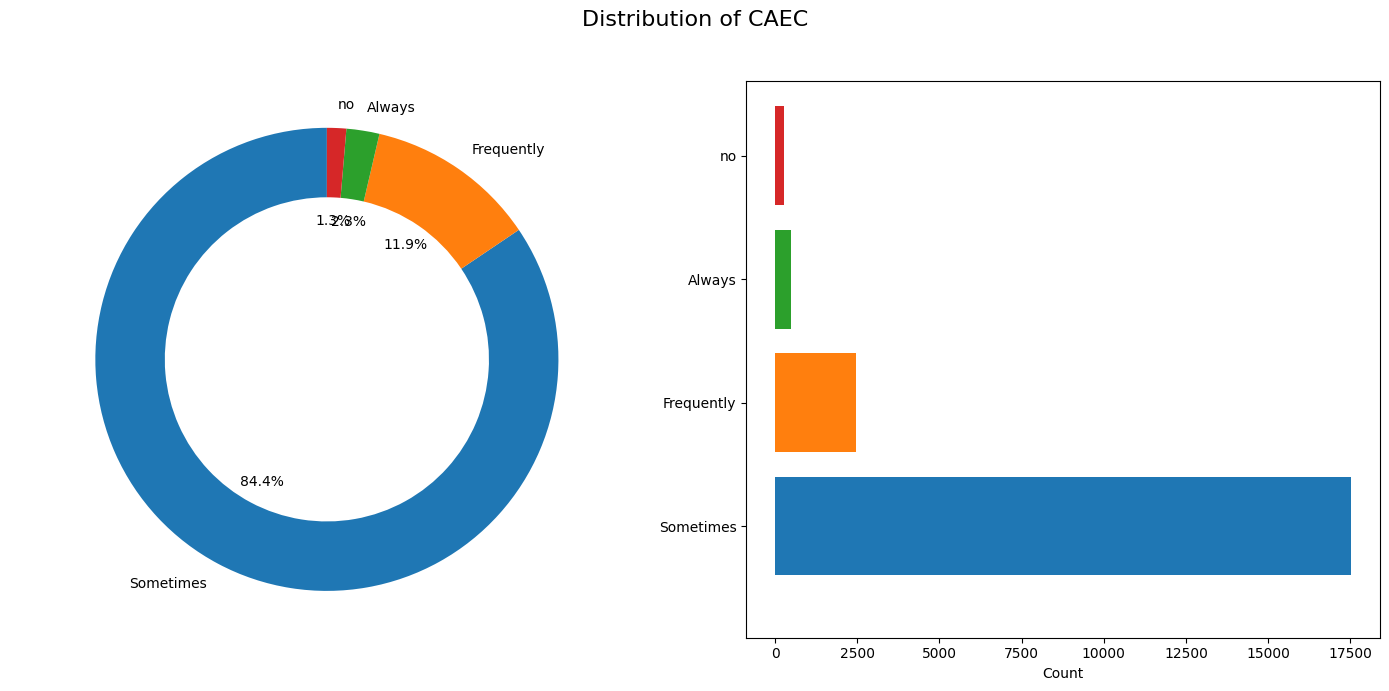

In [61]:
showplot('CAEC')

Consumption of food between meals
- 84.4% people cnsume food between meals
- 11.9% people frequently consume food between meals
- 3% people consume frequently
- 1.2% people do not consume food between meals frequently

### 2.6 SMOKE

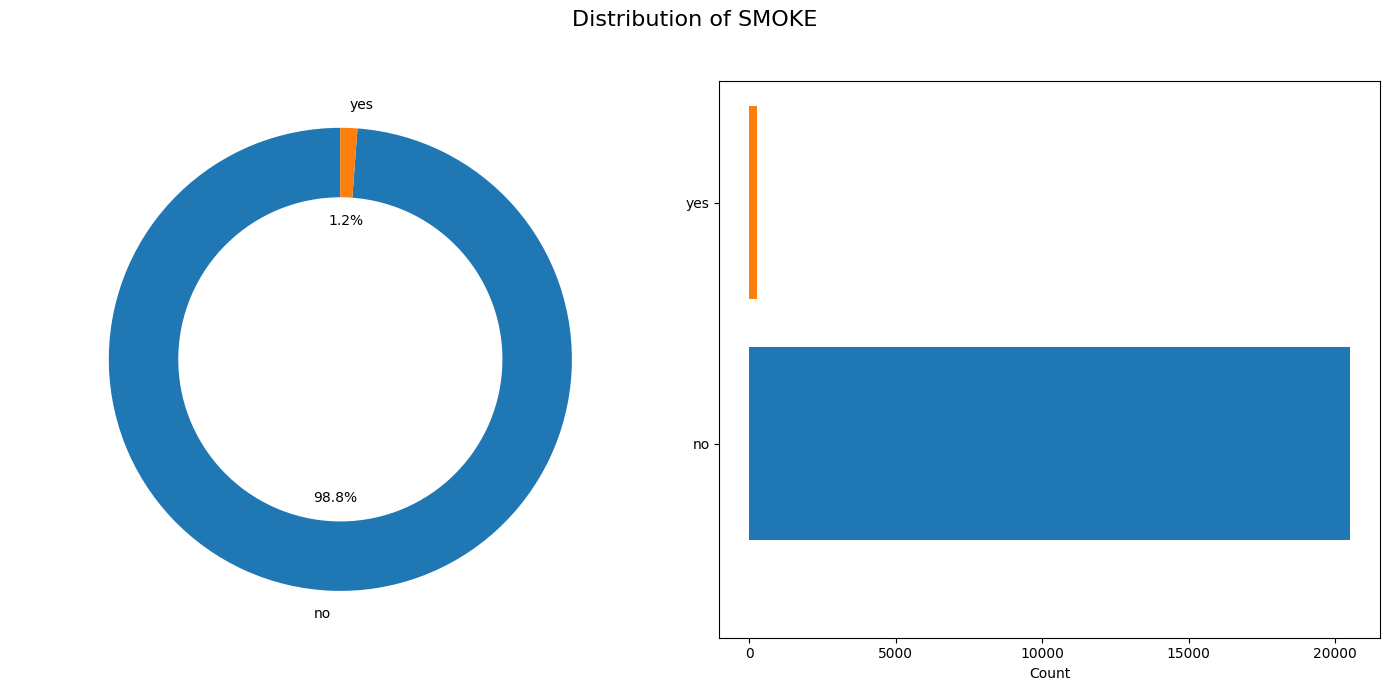

In [62]:
showplot('SMOKE')

- 98.8% people do not Smoke
- 1.2% people smoke

### 2.7 SCC

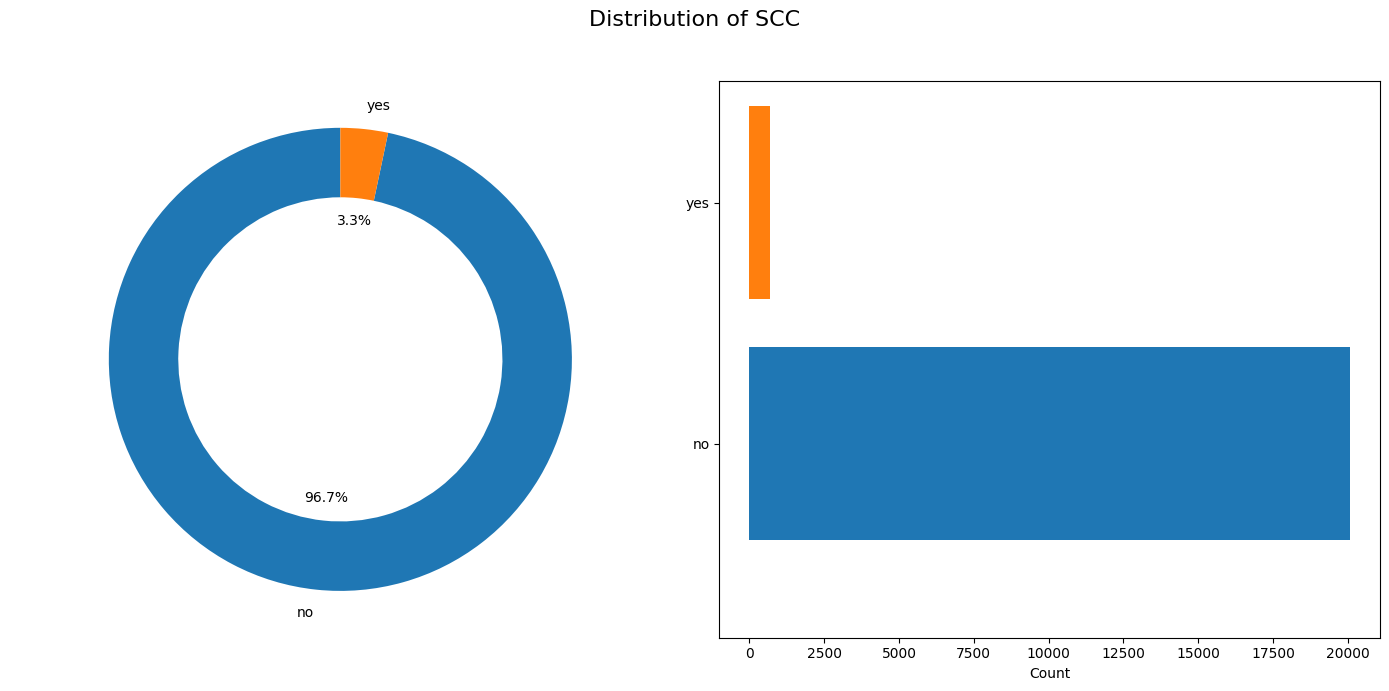

In [63]:
showplot('SCC')

Calories consumption monitoring
- 96.7% people do not monitor their calory intake
- 3.3% people monitor their calory intake

### 2.8 CALC

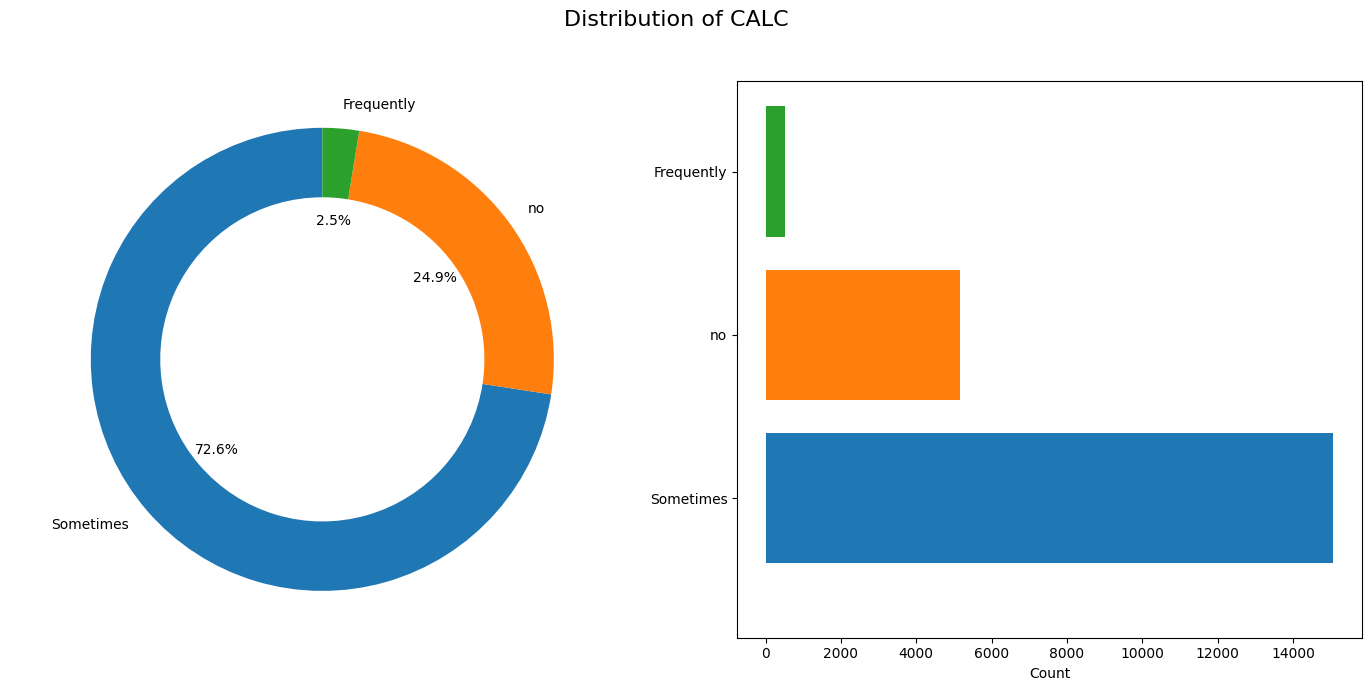

In [64]:
showplot('CALC')

Consumption of alcohol

- 72.6% people consume sometimes
- 24.9% people do not consume at all
- 2.5% people consume frequently

### 2.9 MTRANS

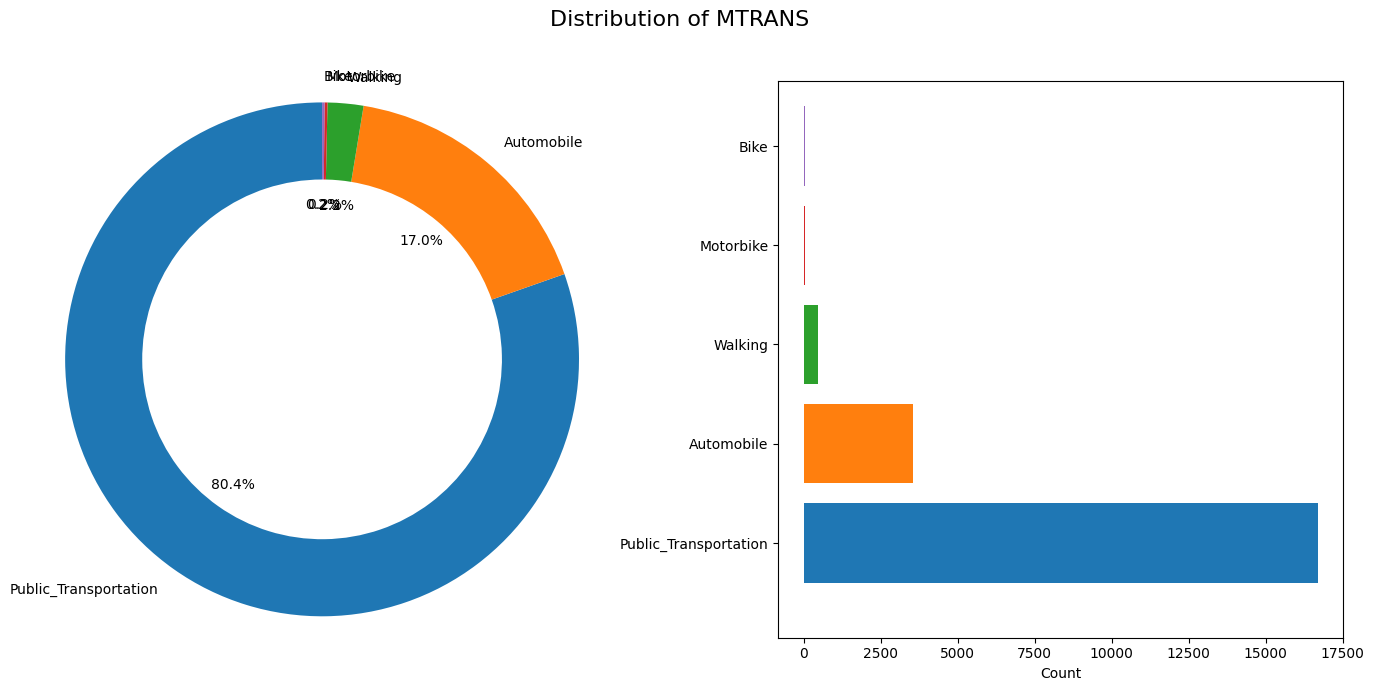

In [65]:
showplot('MTRANS')

- 0.1% people use bikes
- 0.2% people use Motorbike
- 2.2% people walk
- 17% people use Automobiles
- 80.4% people use Public Transportation

# ENCODING

In [66]:
from sklearn.preprocessing import LabelEncoder, PowerTransformer

In [67]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train_df=pd.get_dummies(train_df,columns=columns,drop_first=True,dtype=int)
test_df=pd.get_dummies(test_df,columns=columns,drop_first=True,dtype=int)


le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train_df[i]=le.fit_transform(train_df[i])
    test_df[i]=le.fit_transform(test_df[i])

train_df['NObeyesdad']=le.fit_transform(train_df['NObeyesdad'])

In [69]:
pt = PowerTransformer(method='yeo-johnson')
train_features = train_df.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train_df['NObeyesdad']

# CORRELATION MATRIX

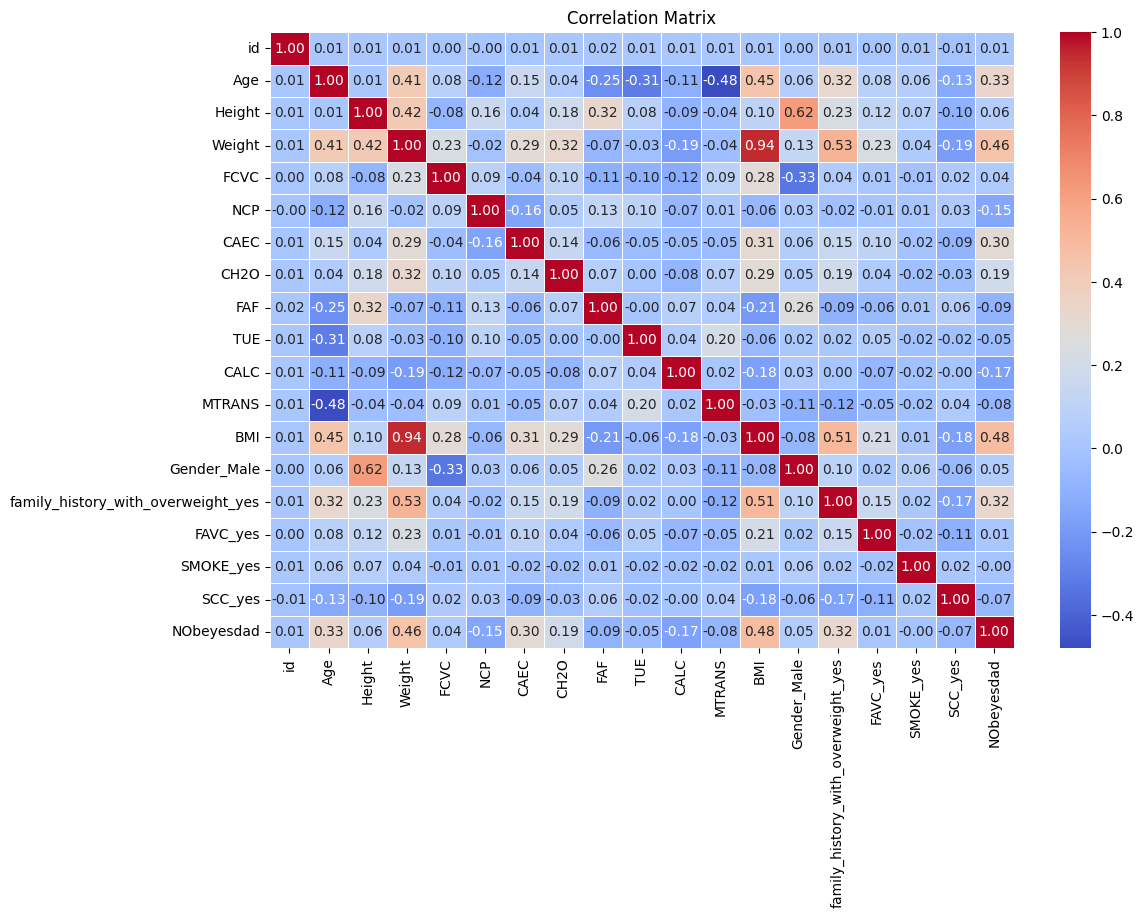

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Remove Outliers

In [71]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [72]:
b=['CALC','NCP']
for i in b:
    train_df=train_df.drop(i,axis=1)

#### Splitting Datastet

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# MODELLING

In [76]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Random Forest Classifier

In [77]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                              criterion='gini', bootstrap=True,
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [78]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9638135003479471
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.89      0.90      0.89        78
           2       0.93      0.90      0.91       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.81      0.81      0.81        90
           6       0.76      0.82      0.79        55

    accuracy                           0.96      1437
   macro avg       0.90      0.91      0.91      1437
weighted avg       0.96      0.96      0.96      1437

Confusion Matrix: [[ 30   1   0   0   0   0   0]
 [  1  70   1   0   0   5   1]
 [  0   0  95   2   0   4   5]
 [  0   0   3 252   0   0   0]
 [  0   0   0   1 820   1   0]
 [  1   8   0   0   0  73   8]
 [  0   0   3   0   0   7  45]]


## 2. XG Boost Classifier

In [80]:
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:18:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.964509394572025
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.89      0.87      0.88        78
           2       0.92      0.92      0.92       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.81      0.81      0.81        90
           6       0.79      0.82      0.80        55

    accuracy                           0.96      1437
   macro avg       0.90      0.91      0.91      1437
weighted avg       0.96      0.96      0.96      1437

Confusion Matrix: [[ 30   1   0   0   0   0   0]
 [  2  68   1   0   0   6   1]
 [  0   0  97   1   0   4   4]
 [  0   0   2 253   0   0   0]
 [  0   0   0   1 820   1   0]
 [  1   7   2   0   0  73   7]
 [  0   0   4   0   0   6  45]]


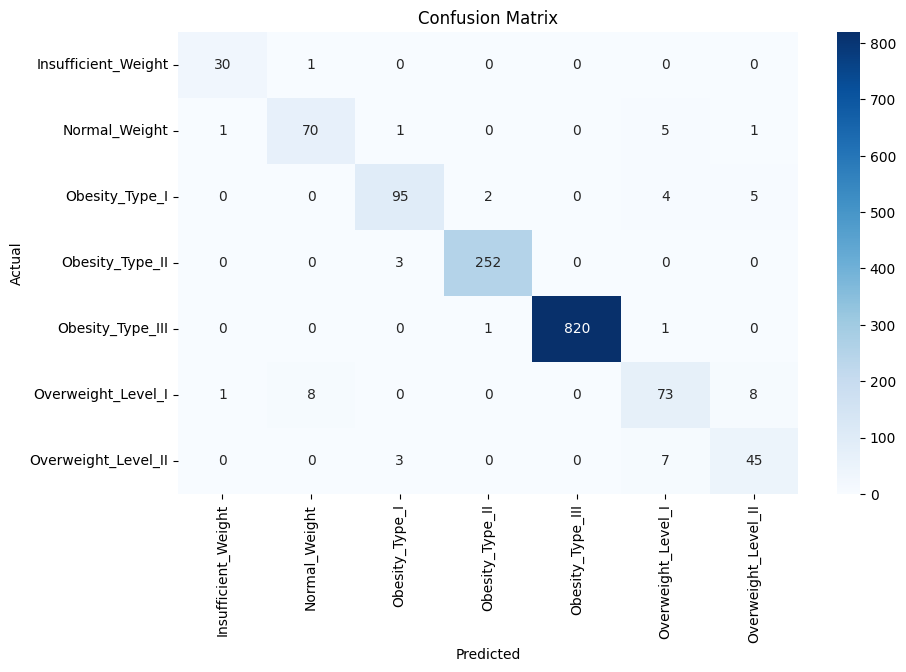

In [79]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# FEATURE IMPORTANCE

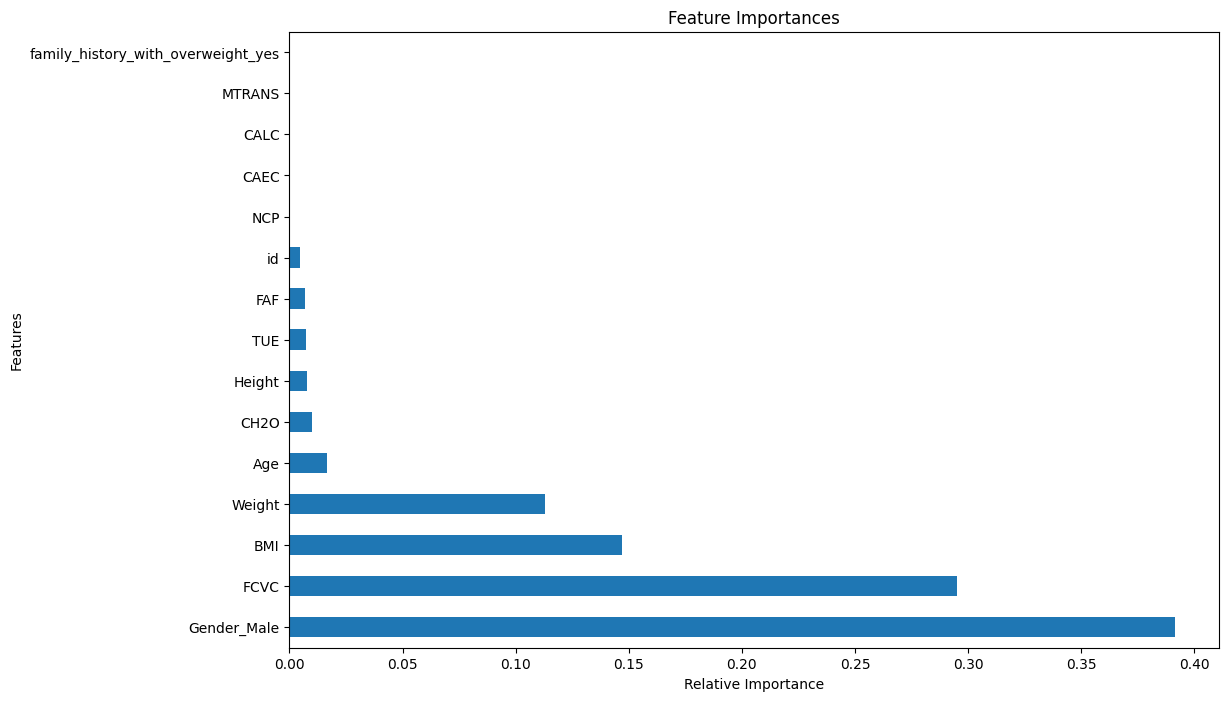

In [82]:
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()